# Sheet 5: Solution

In [17]:
options(jupyter.plot_mimetypes = 'image/png',repr.plot.width=8,repr.plot.height=8) # this is just to render graphics as png and not as svg, and to adjust the default size

## Exercise 1: Perceptron algorithm

1. By definition, if the points are separable then there exists $\beta$ such that 
$$ \beta^T x_i^* > 0 \text{ when } y_i = +1$$ and
$$ \beta^T x_i^* < 0 \text{ when } y_i = -1$$
for all $i=1,2,\ldots, N.$ This is equivalent to the expression that $y_i \beta^T x_i^* > 0$ for all $i.$ Equivalently we can divide this expression by $\| x_i^* \|$ to get
$$y_i \beta^T z_i^* > 0$$
for all $i.$ Since each one of these $N$ values of $y_i \beta^T z_i >0$ is positive let $m>0$ be the smallest value of this product observed over all training set. Thus we have
$$ y_i \beta^T z_i^* \geq m. $$

When we divide both sides of this inequality by this positive value of $m$ we get
$$y_i (\frac{1}{m} \beta)^T z_i \geq 1.$$

If we define $\beta_{\text{sep}} = \frac1m \beta$ we have shown that $y_i \beta_{\text{sep}}^T z_i \geq 1$ for all $i$.

2. From $\beta_{\text{new}} = \beta_{\text{old}} + y_i z_i$ we have that
    $$ \beta_{\text{new}} - \beta_{\text{sep}} = \beta_{\text{old}} - \beta_{\text{sep}} + y_i z_i.$$
    
    When we square this result we get
    $$ \|  \beta_{\text{new}} - \beta_{\text{sep}} \|^2 = \|  \beta_{\text{old}} - \beta_{\text{sep}} \|^2 + y_i^2 \| z_i \|^2 + 2 y_i ( \beta_{\text{old}} - \beta_{\text{sep}})^T z_i.$$
    
    Since $y_i = \pm 1$ and $\| z_i \|^2 = 1$ we have that $y_i^2 \| z_i \|^2=1$ for the second term on the rhs. Note that the third term on the right-hand-side is given by 
    $$2 (y_i \beta_{\text{old}}^T z_i - y_i \beta_{\text{sep}}^T z_i).$$
    
    Since the point $y_i, z_i$ was misclassified by the vector $\beta_{\text{old}}$ we have $y_i \beta_{\text{old}}^T z_i < 0$ (if it were positive we would have classified it correctly). Since $\beta_{\text{sep}}$ is the vector that can correctly classify all points we have $y_i \beta_{\text{sep}}^T z_i \geq 1.$ 
    
    With these two facts one can write 
    $$ 2 (y_i \beta_{\text{old}}^T z_i - y_i \beta_{\text{sep}}^T z_i) \leq 2(0-1) = -2. $$
    
    Thus, we have just shown the requested statement 
    $$  \|  \beta_{\text{new}} - \beta_{\text{sep}} \|^2 \leq \|  \beta_{\text{old}} - \beta_{\text{sep}} \|^2 +1 -2.$$

## Exercise 2: One layer Neural Network 

In this example we compare performance of neural network with one layer and multivariate linear regression on a regression problem. The dataset is housing data for 506 census tracts of Boston from the 1970 census. The goal is to predict median value of owner-occupied homes.

Recall that a neural network can be though of as a nonlinear generalization of the linear model, both for regression and classification. Thus, we will see in this example how use of even quite simple neural network can improve the performance compared to the linear models.

This is a toy example with just a training module (but no testing), just to provide you with the feeling of neural network potential. As discussed in the lecture, the separating hyperplanes classifiers (also multi layer perceptron) try to fit the data into separate classes as well as possible. We will see this "best as possible" also holds for the regression-type problem.

Often neural networks have too many weights and will overfit the data. One of the ways to avoid this is to use regulatization methods (wight decay), which we are going to look at the second part of the exercise. 

In [2]:
# library(mlbench)
library(MASS)
BostonHousing <- Boston
head(BostonHousing)
summary(BostonHousing$medv)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

In [3]:
# Build the multiple linear regression model
lm.fit <- lm(medv~., data = BostonHousing)
lm.predict <- predict(lm.fit)

[1] 21.89483

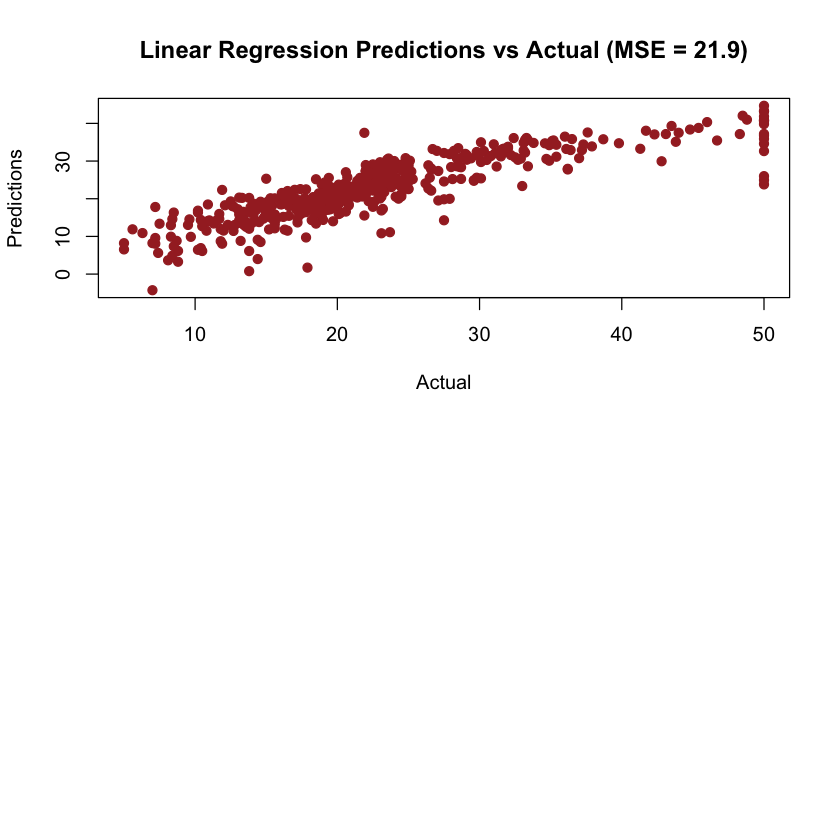

In [4]:
#Calculate the MSE and plot
mean((lm.predict - BostonHousing$medv)^2) # MSE = 21.89483
par(mfrow = c(2,1))
plot(BostonHousing$medv, lm.predict, main = "Linear Regression Predictions vs Actual (MSE = 21.9)", xlab = "Actual",
    ylab = "Predictions", pch=19, col = "brown")

In [9]:
# Build the fee forward neural network / perceptron
library (nnet)
nnet.fit <- nnet (medv/50~., data = BostonHousing, size =5,decay = 0.1) # scale inputs: divide by 50 to get 0-1 range
nnet.predict <- predict (nnet.fit)*50 #multiply by 50 to restore original scale

# weights:  76
initial  value 24.929683 
iter  10 value 15.254824
iter  20 value 13.552189
iter  30 value 11.386719
iter  40 value 9.477173
iter  50 value 7.577477
iter  60 value 6.685637
iter  70 value 5.975162
iter  80 value 4.849069
iter  90 value 3.703682
iter 100 value 3.446232
final  value 3.446232 
stopped after 100 iterations


[1] 14.1695

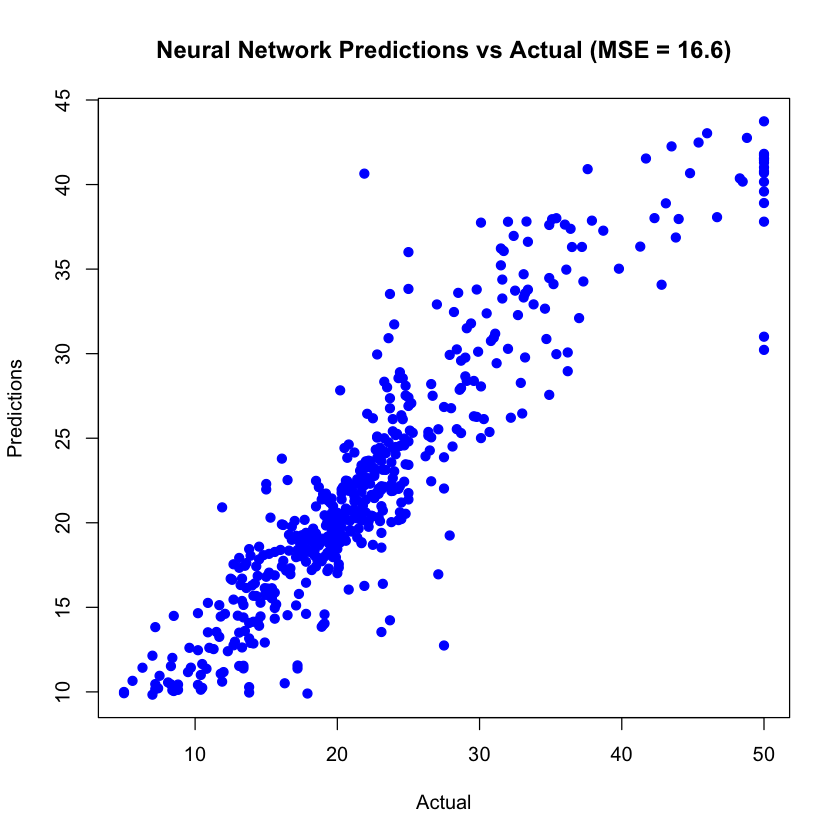

In [10]:
# Calculate the MSE and plot
mean((nnet.predict - BostonHousing$medv)^2) # MSE = 16.56974
plot(BostonHousing$medv, nnet.predict, main = "Neural Network Predictions vs Actual (MSE = 16.6)", xlab = "Actual",
    ylab = "Predictions", pch=19, col = "blue")

To further improve the perforamnce of neural network one can use function train() from the R library caret to optimize the network hyperparameters decay and size. This library also performs resampling to give a better estimate of the error.

Note that we scale linear regression by the same value, so the error statistics are directly comparable.


In [23]:
# library(mlbench)
# data(BostonHousing)
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [25]:
# Optimize the network hyperparameters and print hte results
mygrid <- expand.grid(.decay = c(0.5, 0.1), .size = c(4,5,6))
nnet.fit2 <- train(medv/50~., data = BostonHousing, method ="nnet", maxit = 1000, tuneGrid = mygrid, trace = FALSE)
print(nnet.fit2)

Neural Network 

506 samples
 13 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 506, 506, 506, 506, 506, 506, ... 
Resampling results across tuning parameters:

  decay  size  RMSE        Rsquared 
  0.1    4     0.08337509  0.7958548
  0.1    5     0.08088526  0.8080677
  0.1    6     0.08094513  0.8071379
  0.5    4     0.09119834  0.7661261
  0.5    5     0.08985980  0.7714753
  0.5    6     0.08960435  0.7734226

RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were size = 5 and decay = 0.1. 


In [26]:
# Scale the linear regression and print the results
lm.fit2 <- train(medv/50~., data = BostonHousing, method = "lm")
print(lm.fit2)

Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 506, 506, 506, 506, 506, 506, ... 
Resampling results:

  RMSE        Rsquared 
  0.09592228  0.7243877

Tuning parameter 'intercept' was held constant at a value of TRUE
 
